In [1]:
from pyCodeLib import *
import warnings
import glob
import re
import numpy as np
import pandas as pd
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one


warnings.filterwarnings('ignore')


# sys.path.insert(0, MYHOME)
%load_ext autoreload
%autoreload 2

In [2]:
folder = "/Users/weilu/Research/optimization/mediated_term"

In [264]:
data = glob.glob(folder+"/multisequenceanddcafrustratometry/*.fasta")

In [77]:
def getSeqFromFasta(location):
    seq = ""
    with open(location, "r") as f:
        fastaFile = f.readlines()
    for line in fastaFile[1:]:
        seq += line.strip()
    return seq

In [265]:
len(data)

1829

In [56]:
data[0]

'/Users/weilu/Research/optimization/mediated_term/multisequenceanddcafrustratometry/1VBHA_518-876.fasta'

In [266]:
filtered_data = []
for i, one in enumerate(data):
    problematic = 0
    # one = '/Users/weilu/Research/optimization/mediated_term/multisequenceanddcafrustratometry/1VBHA_518-876.fasta'
    pre = one.split(".")[0]
    p = pre.split("/")[-1]
    name = p.split("_")[0]
    chainName = name[-1]
    low, high = p.split("_")[1].rsplit('-', 1)
#     try:
#         # low, high = p.split("_")[1].split("-")
#         low, high = p.split("_")[1].rsplit('-', 1)
#     except:
#         problematic = True
#         print(one)
#         continue
    length = int(high) - int(low) + 1

    targetPre = "/Users/weilu/Research/server/march_2019/optimization_mult_seq/original_pdbs/"
    # os.system(f"cp {pre}.pdb {targetPre}{name.lower()[:4]}.pdb")
    os.system(f"cp {pre}.pdb {targetPre}{p}.pdb")


    seq1 = getSeqFromFasta(one)

    if length != len(seq1):
        print(i, name, length, len(seq1))
        problematic = 1

    from Bio.PDB.PDBParser import PDBParser
    pdbFileLocation = pre + ".pdb"
    structure = PDBParser().get_structure(name, pdbFileLocation)
    seq = ""
    for r in structure.get_residues():
        _, _, chain, (_, resId, _) = r.get_full_id()
        try:
            resName = three_to_one(r.get_resname())
        except:
            problematic = 2
        # assert chain == "A"
        if chain != chainName:
            print(i, name, length, len(seq1), chain, chainName)
            problematic = 3
        seq += resName

    if seq != seq1:
        print(seq, seq1)
        problematic = 4
    # if not problematic:
        # filtered_data.append(one)
    filtered_data.append([name, p, length, len(seq1), seq, problematic])


6 2HR3D 68 63
9 4IHCH 257 237
11 4M7IA 417 172
13 5K98D 255 244
14 3GVZB 230 222
15 3C6MC 193 190
17 3JU1B 340 325
23 1W1WD 1211 316
25 3EBRA 93 89
27 3U07C 133 113
34 5I47B 193 181
35 2OC6B 96 94
36 5F1RB 76 69
37 4R0VB 341 322
39 1A0IA 233 225
40 3JU6D 216 196
41 3SDVA 269 263
42 3JC75 157 128
44 2WJSA 142 115
47 2ARRA 410 355
48 4CDGB 128 111
49 2QF9B 157 131
50 3EFZB 227 223
51 2VKTA 238 231
54 2PVSB 338 330
57 4H3VB 140 128
60 3HRRB 320 305
61 4MAFH 224 208
62 2QGGA 83 81
65 3MJFA 194 186
66 4UNSB 195 174
67 2G8SB 333 327
70 1OG0H 316 308
72 5D51L 551 549
76 4A0RB 269 251
78 5KF7A 113 110
79 4QQUA 325 324
80 5BYHM 193 192
84 3CRRA 260 175
85 4R6IA 108 106
86 4C5HA 81 66
88 3FZ0D 344 315
91 2YKQC 98 83
93 3THZB 203 181
97 3RC0B 135 124
100 4FX5A 160 156
101 5LQWh 93 0
NFLKKLRNEQVTIELKNGTTVWGTLQSVSPQMNAILTDVKLTLPSDNIASLQYINIRGNTIRQIIL 
104 2PF5E 93 81
106 3HWJB 158 147
107 4NA3B 128 120
109 3S5MA 229 207
114 3F9SB 130 128
118 4ZELB 118 112
119 4KBRH 153 147
121 3T7JB 114 108
122 3MI

857 3J2NZ 194 181
858 5T5MA 471 470
859 4HJFA 239 230
860 3Q6VB 235 198
865 4BUJE 276 23
869 3EQ1B 79 74
871 2HH9B 165 155
872 4R98B 161 159
875 2Q4PA 77 76
877 3SV1C 159 133
879 4N6BF 105 101
882 5LGDB 158 140
889 4KP4B 1061 69
891 1DCUD 205 189
892 3WXBB 218 214
893 3FGVB 89 86
894 2D1HB 76 68
899 1OAZB 118 111
901 3PZ5B 203 183
902 5JTWE 267 242
903 4OFYC 126 105
907 2YQYB 148 114
909 5CZWA 197 193
917 2B3TB 196 157
918 1QR6B 256 252
920 5FUED 340 312
923 1KTRH 144 109
926 3B1BB 336 291
928 3R8FD 69 68
929 3IH5D 191 188
931 1RY2A 86 74
932 4I07A 250 249
940 2WYND 479 468
945 3K11A 373 364
946 4J5TA 515 498
947 5CHHA 185 174
948 3D89A 119 114
949 3W6WB 329 295
956 4Q1FB 235 225
957 5LLIK 66 57
960 1XFCB 129 114
961 3H1TA 97 96
962 2P5XB 198 195
963 2R44A 131 126
967 2JB8A 113 95
970 5F9ZB 86 76
976 1Z3HB 371 368
977 5JEAJ 148 124
981 2YF0A 340 336
982 3U2RA 61 57
983 2BMXC 142 141
986 3OXQF 73 62
987 4DQ9B 141 123
990 2I76B 133 129
992 4I6MC 69 68
993 2YXBA 130 125
996 1E5SA 168 138


1757 2O8FB 327 325
1764 1P9NB 136 126
1765 2PC6D 63 61
1766 3MN2B 82 80
1767 5ERVA 76 71
1775 3HM0D 102 91
1778 3QTYA 157 150
1788 2JI4A 119 112
1789 3NM3F 271 246
1790 3HN3E 187 183
1796 4MTNA 69 68
1802 5AV7D 136 133
1803 4DIED 216 196
1806 3CR7D 166 163
1809 5BYHM 158 125
1810 3L0QB 210 198
1811 3MDOB 202 195
1815 4XD7F 75 70
1821 4S2AA 445 441
1824 5IM3B 99 96
1825 3JYGF 176 174
1828 4WY9A 278 273


In [268]:
filtered_data[0]

['1VBHA',
 '1VBHA_518-876',
 359,
 359,
 'PALSGDLGTFMAWVDDVRKLKVLANADTPDDALTARNNGAQGIGLCRTEHMFFASDERIKAVRQMIMAPTLELRQQALDRLLPYQRSDFEGIFRAMDGLPVTIRLLDPPLHEFLPEGNIEDIVSELCAETGANQEDALARIEKLSEVNPMLGFRGCRLGISYPELTEMQARAIFEAAIAMTNQGVQVFPEIMVPLVGTPQELGHQVTLIRQVAEKVFANVGKTIGYKVGTMIEIPRAALVADEIAEQAEFFSFGTNDLTQMTFGYSRDDVGKFIPVYLAQGILQHDPFEVLDQRGVGELVKFATERGRKARPNLKVGICGEHGGEPSSVAFFAKAGLDYVSCSPFRVPIARLAAAQVLV',
 0]

In [271]:
complete_data = pd.DataFrame(filtered_data, columns=["Name", "FullName", "SeqLength", "Length", "Seq", "Problematic"])
# complete_data.to_csv(folder+"/data_info_3.csv")

In [270]:
complete_data.shape

(1829, 6)

In [352]:
data = pd.read_csv("/Users/weilu/Research/server/april_2019/optimization_mult_seq/data_info_3.csv", index_col=0)

In [354]:
data.sort_values("Length").query("Problematic == 0")

,Name,FullName,SeqLength,Length,Seq,Problematic
519,5JNEE,5JNEE_357-406,50,50,MSLQDPISYTRMKYPSKSINCKHLQCFDALWFLHSQLQIPTWQCPV...,0
1009,5JVHW,5JVHW_1-51,51,51,MKIKLVRSVIGRPGNQVKTVQALGLRKIGDSREVSDTPAVRGMVKT...,0
1425,4B48A,4B48A_1-52,52,52,MAKVRIYQLAKELGMETQELLELLDQMGVAYKSHASTLEEKDAEAV...,0
852,2IYJB,2IYJB_6-57,52,52,QQTLAKMGIKSSDIQPAPVAGMKTVLTNSGVLYITDDGKHIIQGPM...,0
843,5A4OB,5A4OB_14-66,53,53,QKSATQRIRISHRWYRGRRYVDVRLVVVDRDGDFVPTRQGISIRPE...,0
1306,1YWWA,1YWWA_4-56,53,53,DVIKGKWKQLTGKIKERWGDLTDDDLQAADGHAEYLVGKLQERYGW...,0
464,2LW7A,2LW7A_6-58,53,53,LEELVKLQGERVRGLKQQKASAELIEEEVAKLLKLKAQLGPDESKQ...,0
1615,2KZWA,2KZWA_2-54,53,53,NARDNKFNTWNDSRGNYWSDYEGSDENGDGIGDSAYAVNPEAGSMD...,0
1271,4V1Ag,4V1Ag_43-95,53,53,AREFVEREVTDFARRNPGVVIYVNPRPCCVPRVVAEYLNGAVREES...,0
675,3CXLA,3CXLA_206-258,53,53,HNFKVHTFRGPHWCEYCANFMWGLIAQGVKCADCGLNVHKQCSKMV...,0


# problem 1 is probably fine. because ont continues in seq, may not means not continues in space 

# 1087 without any problem

In [248]:
complete_data.query("Problematic == 0").shape

(1087, 5)

In [249]:
# no problematic = 2 or 3.
complete_data.query("Problematic == 4").shape

(19, 5)

In [250]:
complete_data.query("Problematic == 0 and Length > 500")

,Name,FullName,Length,Seq,Problematic
559,5LBQA,5LBQA_288-826,539,VSGLAAARQLQSFGMDVTLLEARDRVGGRVATFRKGNYVADLGAMV...,0
722,2WZSH,2WZSH_235-735,501,IGFKTRKGEQVNARIASSFISFEQAAANMNELGKDNIEQLAQKGKD...,0
1073,4AMFB,4AMFB_11-553,543,LGFDSIPAATTDTISLPKGYKSSVLISWGQPLHKNGPAFDPSGNGT...,0
1209,5IPNC,5IPNC_717-1264,548,VAKRGGVVQYVDASRIVIKVNEDEMYPGEAGIDIYNLTKYTRSNQN...,0
1645,1ULVA,1ULVA_281-956,676,ALRTQYDVSLMTVKSHEDKTFPGAFIASLTIPWGQAASAETHREGY...,0


In [166]:
b = a.query("Length < 100").query("Problematic == 0").sample(10, random_state=0).reset_index(drop=True)
b.to_csv("/Users/weilu/Research/server/march_2019/optimization_mult_seq_test/chosen.csv")

In [284]:
data = pd.read_csv("/Users/weilu/Research/server/march_2019/optimization_mult_seq_test/chosen.csv", index_col=0)

,Name,FullName,Length,Seq,Problematic
0,4TVYB,4TVYB_248-332,85,APAFSHLLDERFTWGGVELHFDVEKGHITRAQVFTDSLNPAPLEAL...,0
1,5LBQA,5LBQA_178-264,87,AFQSRLPHDRMTSQEAACFPDIISGPQQTQKVFLFIRNRTLQLWLD...,0
2,3C2VA,3C2VA_26-117,92,VPSFDFGGYVVGSDLKEANLYCKQDGMLCGVPFAQEVFNQCELQVE...,0
3,2HLQA,2HLQA_33-127,95,LCAFKDPYQQDLGIGESRISHENGTILCSKGSTCYGLWEKSKGDIN...,0
4,5J3BB,5J3BB_5-62,58,STNDFKPGLKVMLDSNPCSIMENEYVKPGKGQAFNRVKLRNLKTGK...,0
5,4ZLHB,4ZLHB_190-257,68,HMASDDLDRAMTLLKKGAAADKNSARVSIMMGRVFMAKGEYAKAVE...,0
6,3O8ZA,3O8ZA_241-293,53,SLFAALNDLPVKTEHLKESGLGRVVIFYTKSKRVEAQLARLAEKLI...,0
7,4ZRJA,4ZRJA_226-315,90,NKKGTELLLGVDALGLHIYDPENRLTPKISFPWNEIRNISYSDKEF...,0
8,2IX1A,2IX1A_24-81,58,GVVKATEKGFGFLEVDAQKSYFIPPPQMKKVMHGDRIIAVIHSEKE...,0
9,4UR3F,4UR3F_328-393,66,FCETCKKCARECPSKAITEGPRTFEGRSIHNQSGKLQWQNDYNKCL...,0


In [208]:
data

,Name,FullName,Length,Seq,Problematic
0,4TVYB,4TVYB_248-332,85,APAFSHLLDERFTWGGVELHFDVEKGHITRAQVFTDSLNPAPLEAL...,0
1,5LBQA,5LBQA_178-264,87,AFQSRLPHDRMTSQEAACFPDIISGPQQTQKVFLFIRNRTLQLWLD...,0
2,3C2VA,3C2VA_26-117,92,VPSFDFGGYVVGSDLKEANLYCKQDGMLCGVPFAQEVFNQCELQVE...,0
3,2HLQA,2HLQA_33-127,95,LCAFKDPYQQDLGIGESRISHENGTILCSKGSTCYGLWEKSKGDIN...,0
4,5J3BB,5J3BB_5-62,58,STNDFKPGLKVMLDSNPCSIMENEYVKPGKGQAFNRVKLRNLKTGK...,0
5,4ZLHB,4ZLHB_190-257,68,HMASDDLDRAMTLLKKGAAADKNSARVSIMMGRVFMAKGEYAKAVE...,0
6,3O8ZA,3O8ZA_241-293,53,SLFAALNDLPVKTEHLKESGLGRVVIFYTKSKRVEAQLARLAEKLI...,0
7,4ZRJA,4ZRJA_226-315,90,NKKGTELLLGVDALGLHIYDPENRLTPKISFPWNEIRNISYSDKEF...,0
8,2IX1A,2IX1A_24-81,58,GVVKATEKGFGFLEVDAQKSYFIPPPQMKKVMHGDRIIAVIHSEKE...,0
9,4UR3F,4UR3F_328-393,66,FCETCKKCARECPSKAITEGPRTFEGRSIHNQSGKLQWQNDYNKCL...,0


In [285]:
for i, line in data.iterrows():
    if "X" in line["Seq"]:
        print(line)

In [302]:
complete_data_filtered.shape

(1810, 6)

In [303]:
n = len(complete_data_filtered)

In [334]:
number_of_runs

181

In [345]:
n = len(complete_data_filtered)
number_of_runs = int(np.ceil(n/10))
perRun = 10
count = 0
for i in range(number_of_runs):
    with open(to_location+f"proteins_name_list/proteins_name_list_{i}.txt", "w") as out:
        cc = 0
        while count < n and cc < perRun:
            fullName = complete_data_filtered.iloc[count]["FullName"]
            out.write(fullName+"\n")
            cc += 1
            count += 1

In [347]:
with open(to_location+f"proteins_name_list/proteins_name_list.txt", "w") as out:
    for i, line in complete_data_filtered.iterrows():
        out.write(line["FullName"]+"\n")

In [300]:
complete_data_filtered = complete_data.query("Problematic != 4").reset_index(drop=True)

In [336]:
from_location = "/Users/weilu/Research/optimization/mediated_term/multisequenceanddcafrustratometry/"
to_location = "/Users/weilu/Research/server/march_2019/optimization_mult_seq/"
# os.system("mkdir -p database/S20_seq")
# os.system("mkdir -p database/dompdb")
for i, line in complete_data_filtered.iterrows():
    # print(line["FullName"])
    print(i)
    fullName = line["FullName"]
    os.system(f"cp {from_location}{fullName}_filtered_0.05.seqs {to_location}alignments/")
    os.system(f"cp {to_location}../optimization_mult_seq/cleaned_pdbs/{fullName}.pdb {to_location}database/dompdb/")
    with open(to_location+f"database/S20_seq/{fullName}.seq", "w") as out:
        with open(from_location+f"{fullName}.fasta") as f:
            a = f.readlines()
        out.write(a[1]+"\n")


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [286]:
from_location = "/Users/weilu/Research/optimization/mediated_term/multisequenceanddcafrustratometry/"
to_location = "/Users/weilu/Research/server/march_2019/optimization_mult_seq_test/"
# os.system("mkdir -p database/S20_seq")
# os.system("mkdir -p database/dompdb")
for i, line in data.iterrows():
    # print(line["FullName"])
    fullName = line["FullName"]
    os.system(f"cp {from_location}{fullName}_filtered_0.05.seqs {to_location}aligments/")
    os.system(f"cp {to_location}../optimization_mult_seq/cleaned_pdbs/{fullName}.pdb {to_location}database/dompdb/")
    with open(to_location+f"database/S20_seq/{fullName}.seq", "w") as out:
        with open(from_location+f"{fullName}.fasta") as f:
            a = f.readlines()
        out.write(a[1]+"\n")
    with open(to_location+f"proteins_name_list/proteins_name_list_{i}.txt", "w") as out:
        out.write(fullName+"\n")

In [288]:
loc = "/Users/weilu/Research/server/march_2019/optimization_mult_seq_test/phis/phi_burial_well_2HLQA_33-127_native_4.0"
a = np.loadtxt(loc)

In [290]:
a.shape

(1000, 60)

In [293]:
b = np.average(a, axis=0)

In [294]:
len(b)

60

In [297]:
c = np.zeros(100)
c[0:60] = b

In [298]:
c

array([1.02120895e+00, 2.04774029e+00, 2.04850226e+00, 4.86511504e+00,
       1.99914379e+00, 3.93221736e+00, 3.89030093e+00, 3.46330586e+00,
       1.56779611e+00, 2.86871570e+00, 3.12796018e+00, 2.79853589e+00,
       6.99447186e-01, 1.12783344e+00, 2.78140343e+00, 3.46941678e+00,
       3.27886956e+00, 4.57498445e-01, 1.92307424e+00, 1.29925846e+00,
       2.22593738e+00, 1.26467769e+00, 1.85645096e+00, 1.31403768e+00,
       6.44498297e+00, 1.17688198e+00, 2.69877366e+00, 3.95480128e+00,
       9.99425448e-01, 1.66408298e+00, 2.05632997e+00, 1.74496335e+00,
       3.18549685e-01, 2.97527360e+00, 1.24112624e+00, 2.12193816e+00,
       2.02052799e+00, 4.13360332e-01, 2.07197791e+00, 1.66660266e+00,
       1.18441951e-02, 2.21237903e-02, 7.97624586e-01, 3.87243867e-02,
       1.70387622e+00, 2.14795223e-02, 1.01061107e-01, 3.85974894e-03,
       2.04567699e-02, 1.47721438e-01, 2.24155235e-02, 3.05324222e-02,
       6.71733582e-03, 4.34403645e-01, 1.59724987e-03, 2.64722104e-02,
      

# check the number of aligned seqs.

## this shows, problematic==4 is bad.

In [253]:
info = []
for i, line in complete_data.iterrows():
    fullName = line["FullName"]
    try:
        with open(f"{from_location}{fullName}_filtered_0.05.seqs") as f:
            a = f.readlines()
            info.append([fullName, len(a)])
    except:
        print(fullName, line)

5LQWh_5-97 Name                                                       5LQWh
FullName                                              5LQWh_5-97
Length                                                        93
Seq            NFLKKLRNEQVTIELKNGTTVWGTLQSVSPQMNAILTDVKLTLPSD...
Problematic                                                    4
Name: 101, dtype: object
1PDIR_344-400 Name                                                       1PDIR
FullName                                           1PDIR_344-400
Length                                                        57
Seq            GAIMMWAADSLPSDAWRFCHGGTVSASDCPLYASRIGTRYGGSSSN...
Problematic                                                    4
Name: 302, dtype: object
5LQWB_856-948 Name                                                       5LQWB
FullName                                           5LQWB_856-948
Length                                                        93
Seq            ILLEPIYEVDITVHAPLLPIVEELMKKRRGSRIYKTIKVAGTPLLE...
P

In [256]:
a = pd.DataFrame(info, columns=["Name", "Length"])

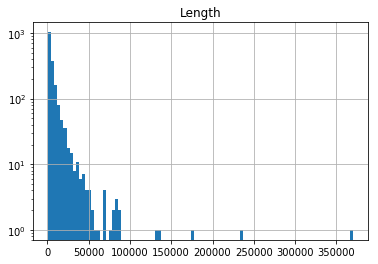

In [260]:
a.hist("Length", bins=100)
plt.yscale("log")

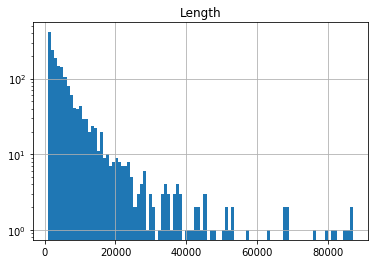

In [261]:
a.query("Length < 1e5").hist("Length", bins=100)
plt.yscale("log")

# 2e4 seems a good cut off

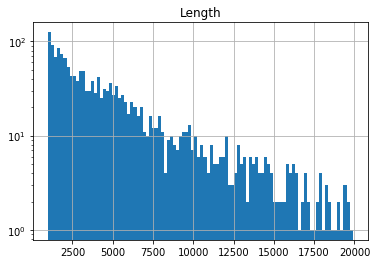

In [262]:
a.query("Length < 2e4").hist("Length", bins=100)
plt.yscale("log")

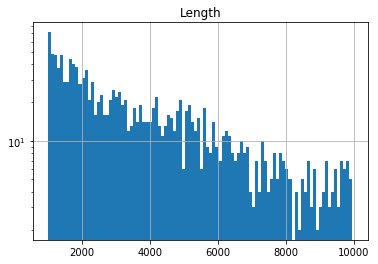

In [275]:
a.query("Length < 1e4").hist("Length", bins=100)
plt.yscale("log")

In [278]:
"777" in "woewowefggjeg77 77sdfsdf"

False

In [263]:
len(a)

1815

In [240]:
def generate_decoy_sequences(fullName, location="./", num_decoys=1000):
    num_decoys = 10
    # location = to_location
    with open(location+f"aligments/{fullName}_filtered_0.05.seqs") as f:
        a = f.readlines()

    with open(location+f"database/S20_seq/{fullName}.seq") as f:
        b = f.readlines()

    with open(location+f"decoys/multiShuffle/{fullName}.decoys", "w") as out:
        for seq in random.sample(a, num_decoys):
            s = seq.strip()
            shuffled_seq = ''.join(random.sample(s,len(s)))
            out.write(shuffled_seq+"\n")
        # print(shuffled_seq)

In [281]:
random.sample(c, 10)

['HCGKCRACITVCPTDAIVAPPYQLDRRCISYTIEHDGSIPEDLREGGNRIESGFGCDDCQLMCPWT\n',
 'HCGSCRACLDACPTDAFPAPPYKLDRRCISYTIEHKGPIDPDIRERGNRIESGYGCDDCLAACPWT\n',
 'RCGSCNRCLEACPTGALVRAPGQINKICISYTQTKEDIPEPYRKKIGNRLESGYGCDTCQVVCPYT\n',
 'HCGSCTKCLDICPTDAFPAPPFRLDRRCISYTIEHRGPVDATLRPAGNRIESGYGCDDCLAICPWT\n',
 'FCIFCGKCPFVCPHSAIRSKFPEADPPTFKHQVKGKEFQKGEHISYVEDCESGTGCQLCVDVCPAT\n',
 'FCSSCSLCIDNCPTGAIDKSRFVIRHHCLTNFNESDEPIPEWVNADHNAVESGVGCMRCQDVCPHT\n',
 'RCGDCRDCVDACPVKAFTGRFTEAEREARHYARRCEKYLNGLEASTGYGYESGGVCGMCLNICPHT\n',
 'RCGSCQACLDACPTDAFPAPPYELDRRCISYTIELDGPVPAEFRAAGNRIESGYGCDDCLAVCPWT\n',
 'HCGSCRACLDICPTEAFPAPPYRLDRRCISYTIEHKGPIAPELREKGNRIESGYGCDDCLAICPWT\n',
 'QCGRCVACITTCPTGAIVEPPYTVDRRCISYTIELEGAIPEAFRPLGNRIESGYGCDDCQLICPWT\n']

In [229]:
c = a + b

In [230]:
c[-4:]

['FCGTCRKCLDICPTKAIVHPPFVVDRRCIAYTIENNDFPEYIKNNLNGWIESGAGCDLCQDVCPWT\n',
 'KCIGCGRCFKVCPRDVLTIVPQRAVDVDFDDDDDDDDSDNSFMTLSAMDCESGIGCEACSRVCPFT\n',
 'FCETCKKCARECPSKAITEGPRTFEGRSIHNQSGKLQWQNDYNKCLGYWPESGGYCGVCVAVCPFT\n',
 'FCETCKKCARECPSKAITEGPRTFEGRSIHNQSGKLQWQNDYNKCLGYWPESGGYCGVCVAVCPFT\n']

In [227]:
len(a)

3251

In [236]:
s = a[0]
''.join(random.sample(s,len(s)))

'DEVCPTVKPG\nYRGQCAELIFCDHPSGLGSICLEDNCGPFRWKSTPSICALGSVLTHRSCRDLECDL'

In [234]:
random.shuffle(list(a[0].strip()))

STCLIFKGNNKSCCNETPPEWICNDFQIEACTWTKANNFSSIDSFKKGAYAICYCTKCSKFSEGKS
VTCPCIRARHVCPLYDESKDGEWGCFVGYGPATCRDPLRAPQTTGAGYNCCTCIEIDSAPHPEVSA
DFQCVNETGRLFGRCTTATKQCGGTGTRTQYGKSACQGIEQIPKEDMLCPETCNFPVKCPALCQLG
KFDSYIDVCMAGIEREFRRSVVDCNCQVLVNGPSATPGTFCAGHVCGGMAKATLPCLCPKDCGQQN
TRCAGPEFDVDPCIVAIGLGRPPGTAEAYTESKHCCNIALERQATANVGCADVCPDIWNVTICCIW
GDEVSCPCCICRADYGVCPCIEPRVLTAAKGTQSCLYSCDERGLILPFSTHEWITTRLVIFPRNGD
CKCDCGCTPKVCGWGYPDIRIYAAIGSEEYNPVATGNRVIQDICRYAISPTSILQNTKICPDVECV
TASGANACIGCEQDKTPGVQTLCCAPISPRAFLARTAFLMVYKHPLNGKCKCIEECEEEAGAAQGC
TFPSNVLGVKIWVLVLNCNTPCINNCCECCCAFAGDDRRGKPHYIIEGEDTDDQRPWPFCTAIKYI
ETAPRRGLDPSSCTENCACYPKGACRINDDVTPWKGCTSIDYCQLAGFCLFPVHGAPERIPDICLL


In [214]:
len(a)

3250

In [176]:
pwd

'/Users/weilu/opt/notebook/Optimization'

In [163]:
a.drop_duplicates("Name").shape

(1746, 5)

In [152]:
a.shape

(1829, 5)

In [151]:
a.query("Problematic == 0").shape

(1087, 5)

In [150]:
a.query("Problematic == 4")

,Name,FullName,Length,Seq,Problematic
101,5LQWh,5LQWh_5-97,93,NFLKKLRNEQVTIELKNGTTVWGTLQSVSPQMNAILTDVKLTLPSD...,4
302,1PDIR,1PDIR_344-400,57,GAIMMWAADSLPSDAWRFCHGGTVSASDCPLYASRIGTRYGGSSSN...,4
331,4M4WO,4M4WO_104-295,192,KKQQSLMKSMYIQQDLLGATFQQVDISDPSRLAMFQHVTDFLKSYN...,4
337,5LQWB,5LQWB_856-948,93,ILLEPIYEVDITVHAPLLPIVEELMKKRRGSRIYKTIKVAGTPLLE...,4
361,5LQWB,5LQWB_481-578,98,AEWSLVRIYSGLLKRGDTVRILDTSQSESRQKRQLHDISKTEDDET...,4
416,2GYQA,2GYQA_10-168,159,TMEDLLLHGLRDIYYAEQQITKALPKMIEQATNRDLSQGLTSHLEE...,4
430,5LQWX,5LQWX_147-682,536,FLALTSDSGNLSIVQIHAGALRLKTLVNQPLTRTTLRRVSPISYME...,4
435,1IYWB,1IYWB_797-862,66,DVEEWRRRQEKRLKELLALAERSQRKLASPGFREKAPKEVVEAEEA...,4
669,1I6VD,1I6VD_29-618,590,PETEAKVCERCAVEVTRSIVRRYRMAHIELATPAAHIWFVKDVPSK...,4
718,3IYVI,3IYVI_356-421,66,NLAGAEELFARKFNALFAQGNYSEAAKVAANAPKGILRTPDTIRRF...,4


In [147]:
a.query("Problematic == 4")

,Name,FullName,Length,Seq,Problematic
101,5LQWh,5LQWh_5-97,93,NFLKKLRNEQVTIELKNGTTVWGTLQSVSPQMNAILTDVKLTLPSD...,4
302,1PDIR,1PDIR_344-400,57,GAIMMWAADSLPSDAWRFCHGGTVSASDCPLYASRIGTRYGGSSSN...,4
331,4M4WO,4M4WO_104-295,192,KKQQSLMKSMYIQQDLLGATFQQVDISDPSRLAMFQHVTDFLKSYN...,4
337,5LQWB,5LQWB_856-948,93,ILLEPIYEVDITVHAPLLPIVEELMKKRRGSRIYKTIKVAGTPLLE...,4
361,5LQWB,5LQWB_481-578,98,AEWSLVRIYSGLLKRGDTVRILDTSQSESRQKRQLHDISKTEDDET...,4
416,2GYQA,2GYQA_10-168,159,TMEDLLLHGLRDIYYAEQQITKALPKMIEQATNRDLSQGLTSHLEE...,4
430,5LQWX,5LQWX_147-682,536,FLALTSDSGNLSIVQIHAGALRLKTLVNQPLTRTTLRRVSPISYME...,4
435,1IYWB,1IYWB_797-862,66,DVEEWRRRQEKRLKELLALAERSQRKLASPGFREKAPKEVVEAEEA...,4
669,1I6VD,1I6VD_29-618,590,PETEAKVCERCAVEVTRSIVRRYRMAHIELATPAAHIWFVKDVPSK...,4
718,3IYVI,3IYVI_356-421,66,NLAGAEELFARKFNALFAQGNYSEAAKVAANAPKGILRTPDTIRRF...,4


In [113]:
len(filtered_data)

1829

In [116]:
a = pd.DataFrame(filtered_data, columns=["Name", "Length", "Seq", "Problematic"])
a.to_csv(folder+"/data_info.csv")

In [123]:
b = a.query("Problematic == 0")

In [139]:
pd.read_csv(folder+"/data_info.csv", index_col=0)["Name"].values

array(['1VBHA', '1K1GA', '3OHBA', ..., '4O1PD', '3BJEB', '4WY9A'],
      dtype=object)

In [142]:
a.drop_duplicates("Name")

,Name,Length,Seq,Problematic
0,1VBHA,359,PALSGDLGTFMAWVDDVRKLKVLANADTPDDALTARNNGAQGIGLC...,0
1,1K1GA,88,SDKVMIPQDEYPEINFVGLLIGPRGNTLKNIEKECNAKIMIRGKGS...,0
2,3OHBA,128,PLSSRPVVKSMMSNKNLRGKSCNSIVDCISWLEVFCAELTSRIQDL...,0
3,2IVXA,141,SSRWFFTREQLENTPSRRCGVEADKELSCRQQAANLIQEMGQRLNV...,0
4,3IKKB,107,VLSLEPQHELKFRGPFTDVVTTNLKLGNPTDRNVCFKVKTTAPRRY...,0
5,2YTUA,85,PPNMTTNERRVIVPADPTLWTQEHVRQWLEWAIKEYSLMEIDTSFF...,0
6,2HR3D,68,VQFSQLVVLGAIDRLGGDVTPSELAAAERRSSNLAALLRELERGGL...,1
7,2P3HA,95,TETSPDKWLIDGDTPLDEVERAIGYELPEGDYETISGLLFDHANAL...,0
8,1X4UA,71,RYPTNNFGNCTGCSATFSVLKKRRSCSNCGNSFCSRCCSFKVPKSS...,0
9,4IHCH,257,EVEDNIRARMEEGYQYVRCQMGMYGGPKRSPRSKTPGIYFDPEAYA...,1


In [140]:
a.query("Name == '5M3MC'")

,Name,Length,Seq,Problematic
38,5M3MC,273,NFDLINIDTSIANAFRRIMISEVPSVAAEYVYFFNNTSVIQDEVLA...,0
580,5M3MC,138,VYFFNNTSVIQDEVLAHRIGLVPLKVDPDMLTWVDSNLPDDEKFTD...,0


In [133]:
len(b)

1087

In [125]:
a.to_csv(folder+"/data_info.csv")

In [134]:
b.query("Length < 200").sample(1)

,Name,Length,Seq,Problematic
135,1ZRTR,132,IFVDVSAVEVGTQLTVKWRGKPVFIRRRDEKDIELARSVPLGALRD...,0


In [135]:
b.query("Length < 200").shape

(868, 4)

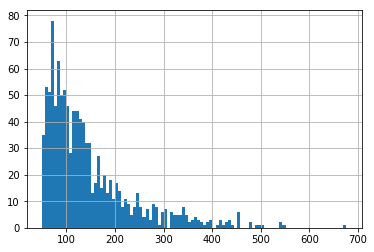

In [131]:
b.sort_values("Length")["Length"].hist(bins=100)

In [109]:
len(filtered_data)

1087

In [110]:
pd.DataFrame([["a", 1],["b", 2]])

,0,1
0,a,1
1,b,2


In [82]:
seq1 = getSeqFromFasta(one)

In [84]:
from Bio.PDB.PDBParser import PDBParser
pdbFileLocation = pre + ".pdb"
structure = PDBParser().get_structure(name, pdbFileLocation)
seq = ""
for r in structure.get_residues():
    _, _, chain, (_, resId, _) = r.get_full_id()
    resName = three_to_one(r.get_resname())
    assert chain == "A"
    seq += resName

In [81]:
len(seq)

359

In [85]:
seq == seq1

True

In [87]:
seq1

'PALSGDLGTFMAWVDDVRKLKVLANADTPDDALTARNNGAQGIGLCRTEHMFFASDERIKAVRQMIMAPTLELRQQALDRLLPYQRSDFEGIFRAMDGLPVTIRLLDPPLHEFLPEGNIEDIVSELCAETGANQEDALARIEKLSEVNPMLGFRGCRLGISYPELTEMQARAIFEAAIAMTNQGVQVFPEIMVPLVGTPQELGHQVTLIRQVAEKVFANVGKTIGYKVGTMIEIPRAALVADEIAEQAEFFSFGTNDLTQMTFGYSRDDVGKFIPVYLAQGILQHDPFEVLDQRGVGELVKFATERGRKARPNLKVGICGEHGGEPSSVAFFAKAGLDYVSCSPFRVPIARLAAAQVLV'

In [86]:
seq

'PALSGDLGTFMAWVDDVRKLKVLANADTPDDALTARNNGAQGIGLCRTEHMFFASDERIKAVRQMIMAPTLELRQQALDRLLPYQRSDFEGIFRAMDGLPVTIRLLDPPLHEFLPEGNIEDIVSELCAETGANQEDALARIEKLSEVNPMLGFRGCRLGISYPELTEMQARAIFEAAIAMTNQGVQVFPEIMVPLVGTPQELGHQVTLIRQVAEKVFANVGKTIGYKVGTMIEIPRAALVADEIAEQAEFFSFGTNDLTQMTFGYSRDDVGKFIPVYLAQGILQHDPFEVLDQRGVGELVKFATERGRKARPNLKVGICGEHGGEPSSVAFFAKAGLDYVSCSPFRVPIARLAAAQVLV'

In [76]:
targetPre = "/Users/weilu/Research/server/march_2019/optimization_mult_seq/original_pdbs/"
os.system(f"cp {pre}.pdb {targetPre}{name.lower()[:4]}.pdb")

0

In [75]:
pre

'/Users/weilu/Research/optimization/mediated_term/multisequenceanddcafrustratometry/1VBHA_518-876'

In [73]:
name

'1VBHA'

In [61]:
protein = one.split(".")[-2]

In [69]:
import re
re.split("\W+", one)

['',
 'Users',
 'weilu',
 'Research',
 'optimization',
 'mediated_term',
 'multisequenceanddcafrustratometry',
 '1VBHA_518',
 '876',
 'fasta']

'1VBHA_518-876'

In [62]:
one.split(".")

['/Users/weilu/Research/optimization/mediated_term/multisequenceanddcafrustratometry/1VBHA_518-876',
 'fasta']

In [7]:
alen(data)

1829

In [9]:
with open(folder+"/3GL5A_2-207_filtered_0.05.seqs", "r") as f:
    d = f.readlines()

In [11]:
len(d)

6705

In [13]:
len(d[0])

205

In [14]:
len(d[0].strip())

204

In [15]:
d[0].strip()

'RVEIWSDIACPWCYVGKARFEKALAAFPHRDGVEVVHRSFELDPGRAKDDVQPVLTLTAKYGSQEQAQAGEDNLGAQAAAEGLAYRTRDRDHGSTFRAQVASLYVKETFQWLAFDEGVFAALWADDRDVGDADVRLADIADGVGLDGEEIRTVVDDPEAWRDRLRDEFADAREAGITGVPTFVYDGHYGARGAVPPSQLERLLT'

In [18]:
with open(folder+"/3GL5A_2-207.fasta", "r") as f:
    fastaFile = f.readlines()
fasta = fastaFile[1].strip()

In [19]:
fasta

'RVEIWSDIACPWCYVGKARFEKALAAFPHRDGVEVVHRSFELDPGRAKDDVQPVLTLTAKYGSQEQAQAGEDNLGAQAAAEGLAYRTRDRDHGSTFDLHRLLHLAKERGRHEALLDAFYRGNFADERSVFNDDERLVELAVGAGLDAEEVRAVLADPAAYADEVRADEREAAQLGATGVPFFVLDRAYGVSGAQPAEVFTQALT'

In [20]:
len(fasta)

204

In [21]:
from Bio.PDB.PDBParser import PDBParser
pdbFileLocation = '/Users/weilu/Research/server/march_2019/optimization_mult_seq/cleaned_pdbs/3gl5.pdb'
structure = PDBParser().get_structure('3gl5', pdbFileLocation)
seq = ""
for r in structure.get_residues():
    _, _, chain, (_, resId, _) = r.get_full_id()
    resName = three_to_one(r.get_resname())
    assert chain == "A"
    seq += resName

RVEIWSDIACPWCYVGKARFEKALAAFPHRDGVEVVHRSFELDPGRAKDDVQPVLT
LTAKYG
SQEQAQAGEDNLGAQAAAEGLAYRTRDRDHGSTFDLHRLLHLAKERGRHEALLDAFYRGNFADERSVFNDDERLVELAVGAGLDAEEVRAVLADPAAYADEVRADEREAAQLGATGVPFFVLDRAYGVSGAQPAEVFTQALT


In [ ]:
seq = ""
for r in structure.get_residues():
    _, _, chain, (_, resId, _) = r.get_full_id()
    resName = three_to_one(r.get_resname())
    assert chain == "A"
    seq += resName

In [55]:
seq == fasta

True

In [22]:
a = pp.get_sequence()

In [29]:
list(structure.get_chains())

[<Chain id=A>]

In [33]:
c = structure[0]["A"]

In [50]:
three_to_one('As')

KeyError: 'As'

In [51]:
seq = ""
for r in structure.get_residues():
    _, _, chain, (_, resId, _) = r.get_full_id()
    resName = three_to_one(r.get_resname())
    assert chain == "A"
    seq += resName

In [52]:
seq

'RVEIWSDIACPWCYVGKARFEKALAAFPHRDGVEVVHRSFELDPGRAKDDVQPVLTLTAKYGSQEQAQAGEDNLGAQAAAEGLAYRTRDRDHGSTFDLHRLLHLAKERGRHEALLDAFYRGNFADERSVFNDDERLVELAVGAGLDAEEVRAVLADPAAYADEVRADEREAAQLGATGVPFFVLDRAYGVSGAQPAEVFTQALT'

In [54]:
len(seq)

204

In [37]:
    
r = list(c.get_residues())[0]

In [38]:
r.get_segid()

'    '

In [39]:
r.get_id()

(' ', 1, ' ')

In [42]:
r.get_full_id()

('3gl5', 0, 'A', (' ', 1, ' '))

In [48]:
r.get_resname()

'THR'

In [45]:
list(structure.get_residues())

[<Residue ARG het=  resseq=1 icode= >,
 <Residue VAL het=  resseq=2 icode= >,
 <Residue GLU het=  resseq=3 icode= >,
 <Residue ILE het=  resseq=4 icode= >,
 <Residue TRP het=  resseq=5 icode= >,
 <Residue SER het=  resseq=6 icode= >,
 <Residue ASP het=  resseq=7 icode= >,
 <Residue ILE het=  resseq=8 icode= >,
 <Residue ALA het=  resseq=9 icode= >,
 <Residue CYS het=  resseq=10 icode= >,
 <Residue PRO het=  resseq=11 icode= >,
 <Residue TRP het=  resseq=12 icode= >,
 <Residue CYS het=  resseq=13 icode= >,
 <Residue TYR het=  resseq=14 icode= >,
 <Residue VAL het=  resseq=15 icode= >,
 <Residue GLY het=  resseq=16 icode= >,
 <Residue LYS het=  resseq=17 icode= >,
 <Residue ALA het=  resseq=18 icode= >,
 <Residue ARG het=  resseq=19 icode= >,
 <Residue PHE het=  resseq=20 icode= >,
 <Residue GLU het=  resseq=21 icode= >,
 <Residue LYS het=  resseq=22 icode= >,
 <Residue ALA het=  resseq=23 icode= >,
 <Residue LEU het=  resseq=24 icode= >,
 <Residue ALA het=  resseq=25 icode= >,
 <Residue